### k Nearest Neighbors  (kNN)

As the name suggest the algorithm works based on majority vote of its k nearest neighbors class. In figure 14, 5 (k) nearest neighbors for the unknown data point are identified based on the chosen distance measure, and the unknown point will be classified based on majority class among identified nearest data points class. The key drawback of kNN is the complexity in searching the nearest neighbors for each sample. 

Things to remember:
*	Choose an odd k value for a 2 class problem
*	k must not be a multiple of the number of classes


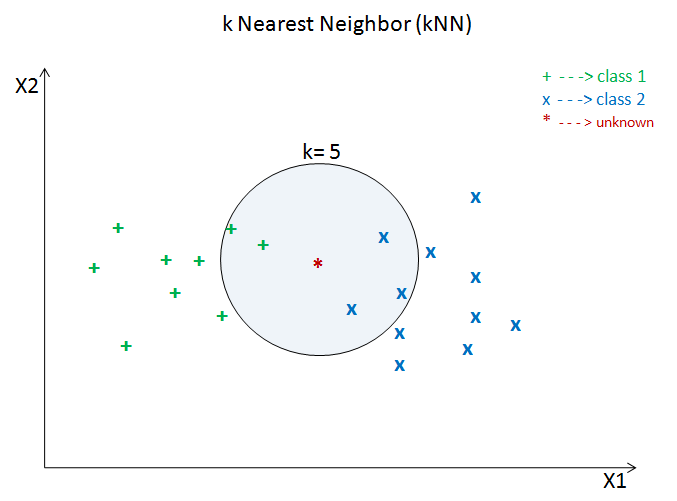

In [1]:
from IPython.display import Image
Image(filename='../Chapter 3 Figures/kNN.png', width=800)

### Load Data

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [2]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics

iris = datasets.load_iris()

X = iris.data
y = iris.target

print('Class labels:', np.unique(y))

('Class labels:', array([0, 1, 2]))


Normalize data: the unit of measurement might differ so lets normalize the data before building the model

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

Split data into train and test. When ever we are using radom function its advised to use a seed to ensure the reproducibility of the results.

In [4]:
# split data into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
clf.fit(X_train, y_train)

# generate evaluation metrics
print "Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train))
print "Train - Confusion matrix :",metrics.confusion_matrix(y_train, clf.predict(X_train))
print "Train - classification report :", metrics.classification_report(y_train, clf.predict(X_train))

print "Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test))
print "Test - Confusion matrix :",metrics.confusion_matrix(y_test, clf.predict(X_test))
print "Test - classification report :", metrics.classification_report(y_test, clf.predict(X_test))

Train - Accuracy : 0.971428571429
Train - Confusion matrix : [[34  0  0]
 [ 0 31  1]
 [ 0  2 37]]
Train - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       0.94      0.97      0.95        32
          2       0.97      0.95      0.96        39

avg / total       0.97      0.97      0.97       105

Test - Accuracy : 0.977777777778
Test - Confusion matrix : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



### Plot Decision Boundary 

Let's consider a two class example to keep things simple

In [7]:
# Let's use sklearn make_classification function to create some test data.
from sklearn.datasets import make_classification
X, y = make_classification(100, 2, 2, 0, weights=[.5, .5], random_state=0) 

# build a simple logistic regression model
clf = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

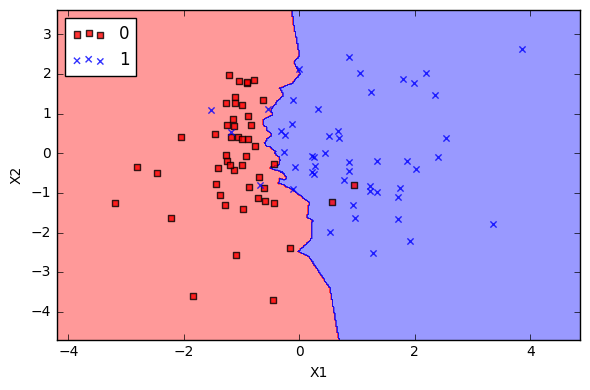

In [8]:
# Plot the decision boundary
plot_decision_regions(X, y, classifier=clf)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()